In [6]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
df_train = pd.read_csv("train.csv")
df_train = df_train.drop(df_train.columns[10:-1], axis=1)
print (df_train.columns)
print(df_train)

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'CLASS'],
      dtype='object')
      AAGE                        ACLSWKR  ADTIND  ADTOCC  \
0       43                LocalGovernment      43      10   
1        0                Not_in_universe       0       0   
2       44                        Private      11      22   
3       43     Self-employed-incorporated      35      17   
4       39                        Private      24      26   
5       27                        Private      33      41   
6       70                Not_in_universe       0       0   
7        4                Not_in_universe       0       0   
8       42                Not_in_universe       0       0   
9       54  Self-employed-notIncorporated      35       2   
10      31                        Private       8      35   
11      35                        Private      41       8   
12      10                Not_in_universe       0       0   
1

In [8]:
for name in df_train.columns:
    if df_train[name].dtype == 'object':  #объектное свойство 
        s = df_train[name].value_counts()
        if s[0] > int(0.7 * df_train.index.size):
            df_train = df_train.drop([name], axis=1)
        for key, value in s.items():
            if value < int(0.1 * df_train.index.size):
                df_train = df_train.replace(to_replace={name: {key: 'Other'}})
print (df_train.columns)

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AMARITL',
       'AMJIND', 'AMJOCC', 'CLASS'],
      dtype='object')


In [9]:
print(df_train)

      AAGE          ACLSWKR  ADTIND  ADTOCC                     AHGA  AHRSPAY  \
0       43            Other      43      10                    Other        0   
1        0  Not_in_universe       0       0                 Children        0   
2       44          Private      11      22   Somecollegebutnodegree        0   
3       43            Other      35      17  Bachelorsdegree(BAABBS)        0   
4       39          Private      24      26  Bachelorsdegree(BAABBS)        0   
5       27          Private      33      41       Highschoolgraduate      600   
6       70  Not_in_universe       0       0       Highschoolgraduate        0   
7        4  Not_in_universe       0       0                 Children        0   
8       42  Not_in_universe       0       0                    Other        0   
9       54            Other      35       2  Bachelorsdegree(BAABBS)        0   
10      31          Private       8      35   Somecollegebutnodegree        0   
11      35          Private 

In [10]:
df_train = df_train.replace(to_replace={'CLASS': {'-50000':0, '50000+':1}})
Y_train = df_train['CLASS'].values.astype(np.int)
df_train = df_train.drop(['CLASS'], axis=1)
print(Y_train)

[1 0 1 ..., 0 0 1]


In [11]:
from copy import deepcopy


def dummy_encode_categorical_columns(df, categorical_columns):
    result_df = deepcopy(df)
    for column in categorical_columns:
        result_df = pd.concat([result_df, pd.get_dummies(result_df[column], 
                                                         prefix=column, prefix_sep=': ')], axis=1)
        del result_df[column]
    return result_df

In [12]:
categorical_columns = set(df_train.columns[df_train.dtypes == 'object'])
df_no_cat = dummy_encode_categorical_columns(df_train, categorical_columns)
X_train=df_no_cat.values.astype(np.float32)
print(X_train)

[[ 43.  43.  10. ...,   0.   1.   0.]
 [  0.   0.   0. ...,   0.   0.   0.]
 [ 44.  11.  22. ...,   0.   0.   1.]
 ..., 
 [  5.   0.   0. ...,   0.   0.   0.]
 [ 64.   0.   0. ...,   0.   1.   0.]
 [ 29.  45.  15. ...,   0.   1.   0.]]


In [13]:
clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.76
0.815
0.796666666667
0.8175
0.81
0.811666666667
0.788571428571
0.81625
0.827777777778
0.817
0.826363636364
0.8375
0.818461538462
0.822269807281
0.81745502998
0.813125
0.80658436214
0.811771238201
0.822105263158
0.8285
0.815238095238
0.810909090909
0.814347826087
0.816666666667
0.8104
0.806923076923
0.807777777778
0.810424848268
0.826956221992
0.814666666667
0.803225806452
0.8084375
0.81
0.803293149074
0.81148243359
0.805054151625
0.807297297297
0.813157894737
0.812820512821
0.8125
0.81243902439
0.817619047619
0.812790697674
0.809318181818
0.813555555556
0.814782608696
0.812765957447
0.812708333333
0.815714285714
0.797
0.809411764706
0.809807692308
0.80641509434
0.811111111111
0.799454545455
0.801464024281
0.791966321698
0.80365454232
0.809322033898
0.810833333333
0.806393442623
0.799516129032
0.805873015873
0.80390625
0.807230769231
0.795
0.79671641791
0.798706072636
0.803651644689
0.806741894015
0.791015349951
0.804722222222
0.797397260274
0.794864864865
0.803866666667
0.79618421

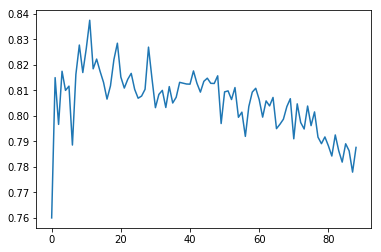

In [103]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
scores = []
for size in np.arange(0.01, 0.9, 0.01):
    x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=size)
    print(accuracy_score(y_test, clf.fit(x_train, y_train).predict(x_test)))
    scores.append(accuracy_score(y_test, clf.fit(x_train, y_train).predict(x_test)))
pl.plot(scores)